In [3]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from IPython.display import display

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Random Forest Model

Create a simple random forest function using the sklearn implementation. Set the max depth equal to None to ensure that all leaves are pure.

In [5]:
def random_forest_classifier_model(X_train, y_train, num_trees, max_depth, verbose):

    rf_model = RandomForestClassifier(
        n_estimators=num_trees, max_depth=None, verbose=verbose
    )
    rf_model.fit(X_train, y_train)

    return rf_model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Parametric Deep Neural Network

Create a simple deep neural network model with three total layers. Utilize for numerical datasets.

In [6]:
def parametric_deep_neural_network(
    X_train, y_train, epochs, batch_size, learning_rate, validation_split, verbose
):

    dnn_model = Sequential()

    dnn_model.add(Dense(32, activation="relu"))
    dnn_model.add(Dense(16, activation="relu"))
    dnn_model.add(Dense(units=3, activation="softmax"))

    # sgd_optimizer = SGD(lr = 0.001, momentum = 0.9)
    adam_optimizer = Adam(learning_rate=learning_rate)
    dnn_model.compile(
        optimizer=adam_optimizer, loss="categorical_crossentropy", metrics=["accuracy"]
    )

    dnn_model.fit(
        x=X_train,
        y=y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        verbose=0,
    )

    # Plotting functionality to visualize training loss and validation loss
    #     losses = pd.DataFrame(dnn_model.history.history)
    #     losses[['loss','val_loss']].plot(figsize = (10,7))
    #     plt.title('Training Loss and Validation Loss over each Epoch')
    #     plt.ylabel('Loss')
    #     plt.xlabel('Epoch')

    return dnn_model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Convolution Nerual Network

In [7]:
def parametric_convolutional_neural_network(
    X_train,
    y_train,
    complexity,
    epochs,
    batch_size,
    learning_rate,
    validation_split,
    verbose,
):

    cnn_model = Sequential()

    cnn_model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
    cnn_model.add(Conv2D(64, (3, 3), activation="relu"))
    cnn_model.add(MaxPooling2D((2, 2)))

    if complexity > 2:
        for _ in range(1, complexity - 1):
            cnn_model.add(Conv2D(64, (3, 3), activation="relu"))

        cnn_model.add(MaxPooling2D((2, 2)))

    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation="relu"))
    cnn_model.add(Dense(1, activation="sigmoid"))

    adam_optimizer = Adam(learning_rate=learning_rate)
    #     sgd = SGD(learning_rate=learning_rate)
    cnn_model.compile(
        optimizer=adam_optimizer, loss="binary_crossentropy", metrics=["accuracy"]
    )

    cnn_model.fit(
        x=X_train,
        y=y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        verbose=verbose,
    )

    return cnn_model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Sample Size Split

A function to randomly split data into a desired sample size.

In [8]:
from random import sample


def random_sample(X, y, samples):

    ordered_indices = [num for num in range(samples)]
    random_indices = sample(ordered_indices, samples)

    X = X[random_indices]
    y = y[random_indices]

    return X, y

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Recreate RF and CNN Demo

In [6]:
# load CIFAR-10 dataset

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [7]:
# Isolate classes 5 and 7

train_index = np.where((y_train == 5) | (y_train == 7))
train_index = train_index[0]

X_train_dh = X_train[train_index]
y_train_dh = y_train[train_index]

test_index = np.where((y_test == 5) | (y_test == 7))
test_index = test_index[0]

X_test_dh = X_test[test_index]
y_test_dh = y_test[test_index]

# X_train_dh, y_train_dh = choose_data_sample_size(X_train_dh, y_train_dh ,500)
# X_test_dh, y_test_dh = choose_data_sample_size(X_test_dh, y_test_dh, 100)

In [8]:
# Prepare RF Data

y_train_rf = np.squeeze(y_train_dh)
y_test_rf = np.squeeze(y_test_dh)

X_train_rf = X_train_dh.reshape(X_train_dh.shape[0], 32*32*3)
X_test_rf = X_test_dh.reshape(X_test_dh.shape[0], 32*32*3)


In [9]:
# Prepare CNN data

y_train_cnn = np.squeeze(y_train_dh)
y_test_cnn = np.squeeze(y_test_dh)

convert = {5:0, 7:1}
y_train_cnn = np.asarray([convert[label] for label in y_train_cnn])
y_test_cnn = np.asarray([convert[label] for label in y_test_cnn])

X_train_cnn = X_train_dh.astype('float32')
X_test_cnn = X_test_dh.astype('float32')
X_train_cnn /= 255
X_test_cnn /= 255

In [ ]:
sample_sizes = [100,166,278,464,774,1292,2154,3594,5994,8000,10000]
# sample_sizes = [100, 166]

iterations = 5

rf_evolution = np.zeros((len(sample_sizes), iterations))
cnn_evolution_simple = np.zeros((len(sample_sizes), iterations))
cnn_evolution_complex = np.zeros((len(sample_sizes), iterations))

for iteration in range(iterations):
    print(iteration)
    
    for sample_size_index, sample_size in enumerate(sample_sizes):
        print(sample_size)
        X_train_rf_ss, y_train_rf_ss = random_sample(X_train_rf, y_train_rf, sample_size)
        X_train_cnn_ss, y_train_cnn_ss = random_sample(X_train_cnn, y_train_cnn, sample_size)

        cnn_model_simpler = parametric_convolutional_neural_network(X_train = X_train_cnn_ss, 
                                                            y_train = y_train_cnn_ss,
                                                            complexity = 3, 
                                                            epochs = 10, 
                                                            batch_size = 50, 
                                                            learning_rate = 0.001, 
                                                            validation_split = 0.3, 
                                                            verbose = 1
                                                           )
        
#         cnn_predictions_simple = np.squeeze(np.where(cnn_model_simpler.predict(X_test_cnn) <= 0.5, 0, 1))
#         cnn_error_simple = 1 - accuracy_score(y_test_cnn, cnn_predictions_simple)

        cnn_accuracy_simple = cnn_model_simpler.evaluate(X_test_cnn, y_test_cnn, batch_size=None, verbose=0, 
                                              sample_weight=None, steps=None,
                                              callbacks=None, max_queue_size=10,
                                              workers=1, use_multiprocessing=False,
                                              return_dict=False
                                             )
    
        cnn_error_simple = 1 - cnn_accuracy_simple[1]
    
        cnn_evolution_simple[sample_size_index][iteration] = cnn_error_simple
        
        
        
        cnn_model_complex = parametric_convolutional_neural_network(X_train = X_train_cnn_ss, 
                                                            y_train = y_train_cnn_ss,
                                                            complexity = 8, 
                                                            epochs = 10, 
                                                            batch_size = 50, 
                                                            learning_rate = 0.001, 
                                                            validation_split = 0.3, 
                                                            verbose = 1
                                                           )

#         cnn_predictions_complex = np.squeeze(np.where(cnn_model_complex.predict(X_test_cnn) <= 0.5, 0, 1))
#         cnn_error_complex = 1 - accuracy_score(y_test_cnn, cnn_predictions_complex)

        cnn_accuracy_complex = cnn_model_complex.evaluate(X_test_cnn, y_test_cnn, batch_size=None, verbose=0, 
                                              sample_weight=None, steps=None,
                                              callbacks=None, max_queue_size=10,
                                              workers=1, use_multiprocessing=False,
                                              return_dict=False
                                             )
    
        cnn_error_complex = 1 - cnn_accuracy_complex[1]
    
        cnn_evolution_complex[sample_size_index][iteration] = cnn_error_complex

        

        rf_model = random_forest_classifier_model(X_train = X_train_rf_ss,
                                                  y_train = y_train_rf_ss, 
                                                  num_trees = 500,
                                                  max_depth = None,
                                                  verbose = 2
                                                 )

        rf_predictions = rf_model.predict(X_test_rf)
        rf_error = 1 - accuracy_score(y_test_rf, rf_predictions)

#         rf_error = rf_model.evaluate(X_test_cnn, y_test_cnn, batch_size=None, verbose=0, 
#                                               sample_weight=None, steps=None,
#                                               callbacks=None, max_queue_size=10,
#                                               workers=1, use_multiprocessing=False,
#                                               return_dict=False
#                                              )
        rf_evolution[sample_size_index][iteration] = rf_error
        

In [15]:
print(cnn_evolution_complex)
print('\n')
print(cnn_evolution_simple)
print('\n')
print(rf_evolution)

%store cnn_evolution_complex
%store cnn_evolution_simple
%store rf_evolution

[[0.37949997 0.43150002 0.4835     0.46100003 0.5       ]
 [0.5        0.44       0.5        0.49550003 0.421     ]
 [0.33850002 0.42449999 0.36049998 0.37349999 0.3545    ]
 [0.27749997 0.28149998 0.31150001 0.30599999 0.35299999]
 [0.33450001 0.26950002 0.32249999 0.32300001 0.32200003]
 [0.26349998 0.28149998 0.26300001 0.25550002 0.28299999]
 [0.255      0.22049999 0.21100003 0.24250001 0.24049997]
 [0.24650002 0.21899998 0.20599997 0.21850002 0.19950002]
 [0.20099998 0.15549999 0.18599999 0.148      0.18449998]
 [0.17799997 0.14499998 0.14649999 0.15799999 0.17199999]
 [0.13050002 0.14300001 0.11799997 0.12699997 0.13499999]]


[[0.38550001 0.38849998 0.34500003 0.37800002 0.35549998]
 [0.39200002 0.33950001 0.37949997 0.3775     0.35650003]
 [0.33050001 0.33600003 0.38450003 0.36049998 0.3265    ]
 [0.25       0.25650001 0.30000001 0.28399998 0.26599997]
 [0.27100003 0.24800003 0.24599999 0.28649998 0.25599998]
 [0.22299999 0.23100001 0.20649999 0.222      0.31050003]
 [0.2064999

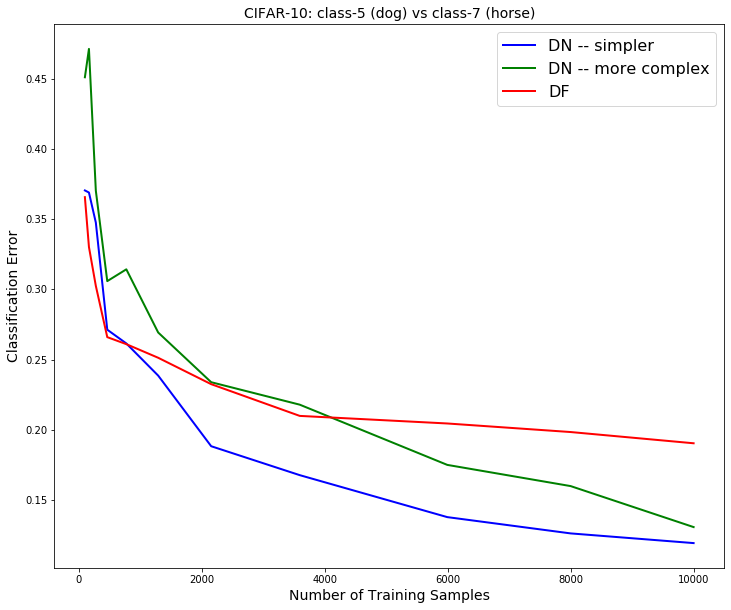

In [87]:
fig = plt.figure(figsize = (12,10))
ax = plt.subplot(111)

cnn_evolution_simple_mean = np.mean(cnn_evolution_simple, axis = 1)
cnn_evolution_complex_mean = np.mean(cnn_evolution_complex, axis = 1)
rf_evolution_mean = np.mean(rf_evolution, axis = 1)

ax.plot(sample_sizes, cnn_evolution_simple_mean, color = 'blue', linewidth = 2)
ax.plot(sample_sizes, cnn_evolution_complex_mean, color = 'green', linewidth = 2)
ax.plot(sample_sizes, rf_evolution_mean, color = 'red', linewidth = 2)
plt.title('CIFAR-10: class-5 (dog) vs class-7 (horse)', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.legend(['DN -- simpler', 'DN -- more complex', 'DF'], prop={'size': 16})

fig.savefig('demo_2.png')

## Extrapolating Performance from Results

In [79]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

/Users/michaelainsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.95937e-24): result may not be accurate.
  overwrite_a=True).T
/Users/michaelainsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.07428e-32): result may not be accurate.
  overwrite_a=True).T
/Users/michaelainsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.1451e-40): result may not be accurate.
  overwrite_a=True).T
/Users/michaelainsworth/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.18634e-48): result may not be accurate.
  overwrite_a=True).T


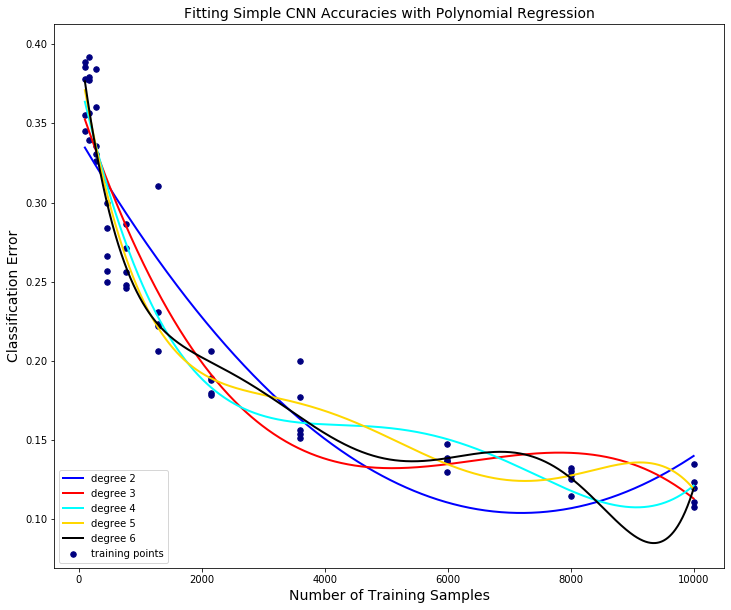

In [90]:
y = cnn_evolution_simple.reshape(55,)

X = []
for value in sample_sizes:
    for _ in range(5):
        X.append(value)
        
X_plot = np.asarray(X)
X = X_plot[:,np.newaxis]

#X = np.asarray(sample_sizes)[:,np.newaxis]
# y = cnn_evolution_simple_mean


xx = np.linspace(100,10000,1000)
xxNew = xx[:,np.newaxis]

colors = ['blue', 'red', 'cyan', 'gold', 'black']
lw = 2

plt.figure(figsize = (12,10))
plt.scatter(X_plot, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([2, 3, 4, 5, 6]):
    regression_model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=10))
    regression_model.fit(X, y)
    y_plot = regression_model.predict(xxNew)
    plt.plot(xx, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.title('Fitting Simple CNN Accuracies with Polynomial Regression', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.legend(loc='lower left')



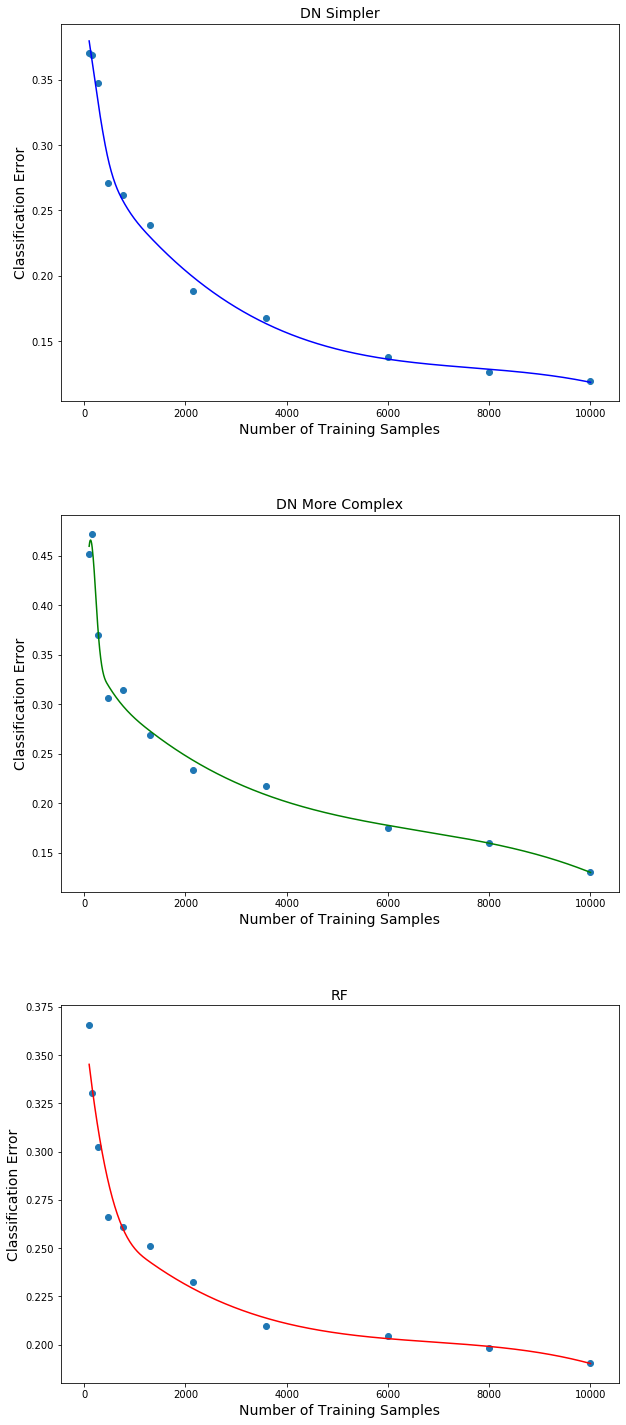

In [146]:
# Fit 1D curve using B-spline representation

from scipy.interpolate import splev, splrep

X_spline = np.asarray(sample_sizes)
y_spline_cnn_simple = cnn_evolution_simple_mean
y_spline_cnn_complex = cnn_evolution_complex_mean
y_spline_rf = rf_evolution_mean

x2 = np.linspace(100,10000,1000)

spl_cnn_simple = splrep(X_spline,y_spline_cnn_simple, k=3, s=0.001)
y2_cnn_simple = splev(x2, spl_cnn_simple)

spl_cnn_complex = splrep(X_spline,y_spline_cnn_complex, k=3, s=0.001)
y2_cnn_complex = splev(x2, spl_cnn_complex)

spl_rf = splrep(X_spline,y_spline_rf, k=3, s=0.001)
y2_rf = splev(x2, spl_rf)

fig = plt.figure(figsize = (10,25))

ax = plt.subplot(311)
ax.plot(x2, y2_cnn_simple, 'b')
ax.scatter(X_spline, y_spline_cnn_simple) 
plt.title('DN Simpler', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)

ax = plt.subplot(312)
ax.plot(x2, y2_cnn_complex, 'g')
ax.scatter(X_spline, y_spline_cnn_complex) 
plt.title('DN More Complex', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)

ax = plt.subplot(313)
ax.plot(x2, y2_rf, 'r')
ax.scatter(X_spline, y_spline_rf) 
plt.title('RF', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)


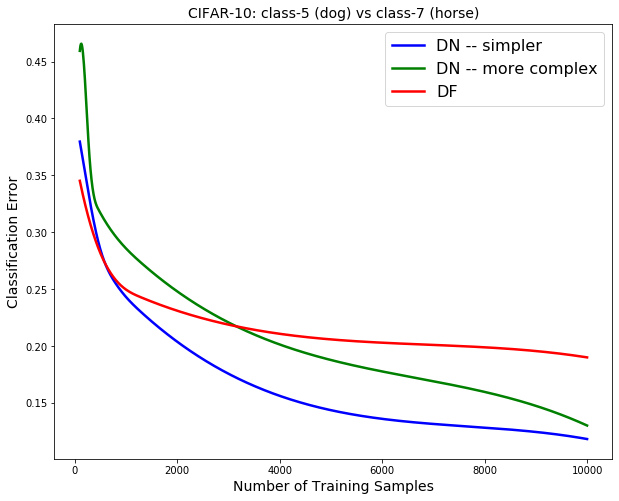

In [156]:
fig = plt.figure(figsize = (10,8))
ax = plt.subplot(111)

ax.plot(x2, y2_cnn_simple, 'b', linewidth = 2.5)
ax.plot(x2, y2_cnn_complex, 'g', linewidth = 2.5)
ax.plot(x2, y2_rf, 'r', linewidth = 2.5)

plt.title('CIFAR-10: class-5 (dog) vs class-7 (horse)', fontsize = 14)
plt.ylabel('Classification Error', fontsize = 14)
plt.xlabel('Number of Training Samples', fontsize = 14)
plt.legend(['DN -- simpler', 'DN -- more complex', 'DF'], prop={'size': 16})

fig.savefig('demo_3.png')
